In [1]:
from google.colab import drive
drive.mount("drive")

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


# Loading data

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
all_data = pd.read_csv("/content/drive/MyDrive/Crypto2022/data/extracted_data/all_ddos_data.csv")
all_data

,nTx,Weight,Size,nVin_Sum,nVin_Max,nVin_Avg,nVin_Stdv,nVout_Sum,nVout_Max,nVout_Min,...,Vout_value_Max_Avg.1,Vout_value_Min_Avg.1,Vout_value_Avg_Avg.1,Vout_value_Stdv_Avg.1,Vout_value_Sum_Stdv.1,Vout_value_Max_Stdv.1,Vout_value_Min_Stdv.1,Vout_value_Avg_Stdv.1,Vout_value_Stdv_Stdv.1,Is DDoS Attack ?
0,263.0,522324.0,130581.0,630.0,46.0,2.395437,4.301770,574.0,32.0,1.0,...,19.859117,1.116233,10.469447,9.362754,107.058714,106.626242,10.603761,54.217235,52.930936,1.0
1,520.0,810072.0,202518.0,962.0,39.0,1.850000,2.545093,1100.0,20.0,1.0,...,4.471181,0.546634,2.482065,1.952130,27.707261,25.106159,3.961290,13.905032,11.368915,1.0
2,1024.0,1843988.0,460997.0,2259.0,151.0,2.206055,6.441104,2153.0,64.0,1.0,...,18.096809,0.921873,9.248560,8.417921,92.757748,89.411144,4.470257,44.551254,43.914407,1.0
3,91.0,292416.0,73104.0,404.0,46.0,4.439560,7.476276,281.0,41.0,1.0,...,7.775807,2.133413,4.753616,2.702734,25.457229,24.144463,12.093965,16.121727,10.208519,1.0
4,676.0,996584.0,249146.0,1195.0,27.0,1.767751,1.985352,1361.0,8.0,1.0,...,20.156704,0.946217,10.246610,9.433812,120.007297,112.708442,6.135034,55.476641,54.739285,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152935,144.0,271480.0,67870.0,344.0,59.0,2.388889,5.294272,290.0,6.0,1.0,...,10.042027,0.705118,5.372587,4.667398,74.030660,73.156415,2.822569,37.048927,36.156742,0.0
152936,39.0,54444.0,13611.0,67.0,6.0,1.717949,1.239287,74.0,3.0,1.0,...,24.934455,10.409539,17.672176,7.262114,165.637878,110.755876,55.288298,82.802112,28.383778,0.0
152937,168.0,428732.0,107183.0,545.0,219.0,3.244048,16.908893,348.0,8.0,1.0,...,12.528032,3.304067,7.900074,4.587231,108.483768,81.647269,27.174261,54.256912,27.545603,0.0
152938,204.0,364116.0,91029.0,445.0,14.0,2.181373,2.100758,410.0,6.0,1.0,...,13.521109,8.002480,10.707613,2.737336,100.916248,100.494018,97.808888,98.448399,11.846447,0.0


In [3]:
data_0 = pd.read_csv("/content/drive/MyDrive/Crypto2022/data/extracted_data/ddos_data_attack.csv")
data_0

,nTx,Weight,Size,nVin_Sum,nVin_Max,nVin_Min,nVin_Avg,nVin_Stdv,nVout_Sum,nVout_Max,...,Vout_value_Max_Avg.1,Vout_value_Min_Avg.1,Vout_value_Avg_Avg.1,Vout_value_Stdv_Avg.1,Vout_value_Sum_Stdv.1,Vout_value_Max_Stdv.1,Vout_value_Min_Stdv.1,Vout_value_Avg_Stdv.1,Vout_value_Stdv_Stdv.1,Is DDoS Attack ?
0,263.0,522324.0,130581.0,630.0,46.0,1.0,2.395437,4.301770,574.0,32.0,...,19.859117,1.116233,10.469447,9.362754,107.058714,106.626242,10.603761,54.217235,52.930936,1.0
1,520.0,810072.0,202518.0,962.0,39.0,1.0,1.850000,2.545093,1100.0,20.0,...,4.471181,0.546634,2.482065,1.952130,27.707261,25.106159,3.961290,13.905032,11.368915,1.0
2,1024.0,1843988.0,460997.0,2259.0,151.0,1.0,2.206055,6.441104,2153.0,64.0,...,18.096809,0.921873,9.248560,8.417921,92.757748,89.411144,4.470257,44.551254,43.914407,1.0
3,91.0,292416.0,73104.0,404.0,46.0,1.0,4.439560,7.476276,281.0,41.0,...,7.775807,2.133413,4.753616,2.702734,25.457229,24.144463,12.093965,16.121727,10.208519,1.0
4,676.0,996584.0,249146.0,1195.0,27.0,1.0,1.767751,1.985352,1361.0,8.0,...,20.156704,0.946217,10.246610,9.433812,120.007297,112.708442,6.135034,55.476641,54.739285,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17165,328.0,996108.0,249027.0,1318.0,146.0,1.0,4.018293,11.151109,954.0,151.0,...,7.451584,2.596496,4.950414,2.372352,55.729836,45.100592,19.905337,31.147831,15.634308,1.0
17166,736.0,996404.0,249101.0,1139.0,18.0,1.0,1.547554,1.130323,1532.0,8.0,...,11.653602,1.136747,6.088910,5.155050,66.870410,66.018468,11.346173,33.438013,31.971803,1.0
17167,6.0,5548.0,1387.0,6.0,1.0,1.0,1.000000,0.000000,11.0,2.0,...,81.700263,19.447327,50.573795,31.126468,41.059046,31.018805,14.907729,17.123075,17.291722,1.0
17168,427.0,720000.0,180000.0,857.0,18.0,1.0,2.007026,1.791849,882.0,12.0,...,7.874914,0.515887,3.818004,3.560256,47.887032,47.538012,3.672231,23.364146,23.523611,1.0


In [ ]:
data_1 = pd.read_csv("/content/drive/MyDrive/Crypto2022/data/extracted_data/ddos_data_normal_0_70000.csv")
data_1

,nTx,Weight,Size,nVin_Sum,nVin_Max,nVin_Min,nVin_Avg,nVin_Stdv,nVout_Sum,nVout_Max,...,Vout_value_Max_Avg.1,Vout_value_Min_Avg.1,Vout_value_Avg_Avg.1,Vout_value_Stdv_Avg.1,Vout_value_Sum_Stdv.1,Vout_value_Max_Stdv.1,Vout_value_Min_Stdv.1,Vout_value_Avg_Stdv.1,Vout_value_Stdv_Stdv.1,Is DDoS Attack ?
0,1.0,876.0,219.0,1.0,1.0,1.0,1.000000,0.000000,1.0,1.0,...,50.000000,50.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,9.0,27996.0,6999.0,51.0,42.0,1.0,5.666667,12.849557,15.0,2.0,...,383.957778,320.150000,352.053889,31.903889,800.742154,695.849855,663.043084,676.263801,67.704119,0.0
2,1.0,860.0,215.0,1.0,1.0,1.0,1.000000,0.000000,1.0,1.0,...,50.000000,50.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,12.0,12216.0,3054.0,12.0,1.0,1.0,1.000000,0.000000,23.0,2.0,...,10.288333,4.520000,7.404167,2.884167,13.905847,14.022186,13.721003,13.346940,3.781932,0.0
4,14.0,14868.0,3717.0,15.0,2.0,1.0,1.071429,0.257539,26.0,2.0,...,17.628571,4.073571,10.851071,6.777500,14.975523,15.238246,12.782501,12.437584,6.565420,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53.0,68996.0,17249.0,74.0,5.0,1.0,1.396226,0.958372,102.0,2.0,...,16.002365,2.818318,9.410342,6.592024,29.173536,28.573195,9.874446,16.320627,13.805912,0.0
69996,15.0,19792.0,4948.0,22.0,4.0,1.0,1.466667,0.884433,25.0,2.0,...,21.511319,6.235965,13.873642,7.637677,39.826239,40.087608,12.170453,21.666604,20.202138,0.0
69997,39.0,99412.0,24853.0,127.0,35.0,1.0,3.256410,5.912689,73.0,2.0,...,40.155523,7.221278,23.688401,16.467122,90.607414,83.508701,25.713714,49.142528,37.449447,0.0
69998,21.0,23660.0,5915.0,24.0,3.0,1.0,1.142857,0.466569,41.0,2.0,...,27.139904,3.716129,15.428016,11.711887,20.267703,19.867681,10.570425,12.517090,9.826076,0.0


In [ ]:
data_2 = pd.read_csv("/content/drive/MyDrive/Crypto2022/data/extracted_data/ddos_data_normal_70000_140000.csv")
data_2

,nTx,Weight,Size,nVin_Sum,nVin_Max,nVin_Min,nVin_Avg,nVin_Stdv,nVout_Sum,nVout_Max,...,Vout_value_Max_Avg.1,Vout_value_Min_Avg.1,Vout_value_Avg_Avg.1,Vout_value_Stdv_Avg.1,Vout_value_Sum_Stdv.1,Vout_value_Max_Stdv.1,Vout_value_Min_Stdv.1,Vout_value_Avg_Stdv.1,Vout_value_Stdv_Stdv.1,Is DDoS Attack ?
0,642.0,995840.0,248960.0,1107.0,26.0,1.0,1.724299,2.531484,1451.0,19.0,...,15.190366,0.631178,7.908393,7.253402,72.665734,72.125723,2.475913,36.238948,35.913621,0.0
1,278.0,1117252.0,279313.0,1423.0,418.0,1.0,5.118705,27.702238,839.0,112.0,...,67.668793,2.253686,34.397874,32.353283,475.847636,473.951278,13.377477,237.418235,236.728971,0.0
2,489.0,996092.0,249023.0,1204.0,197.0,1.0,2.462168,9.823759,1132.0,41.0,...,13.040181,0.804261,6.865093,6.057544,50.175331,48.653292,3.592381,24.871180,23.881862,0.0
3,350.0,996036.0,249009.0,1209.0,67.0,1.0,3.454286,7.574538,888.0,41.0,...,30.018261,2.262691,16.060885,13.735562,67.943188,59.033820,14.352187,32.404233,28.072447,0.0
4,472.0,996620.0,249155.0,1181.0,45.0,1.0,2.502119,4.529563,1094.0,73.0,...,37.356729,0.734387,18.881562,18.176126,339.925455,338.729445,3.465961,169.448847,169.246107,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,144.0,271480.0,67870.0,344.0,59.0,1.0,2.388889,5.294272,290.0,6.0,...,10.042027,0.705118,5.372587,4.667398,74.030660,73.156415,2.822569,37.048927,36.156742,0.0
69996,39.0,54444.0,13611.0,67.0,6.0,1.0,1.717949,1.239287,74.0,3.0,...,24.934455,10.409539,17.672176,7.262114,165.637878,110.755876,55.288298,82.802112,28.383778,0.0
69997,168.0,428732.0,107183.0,545.0,219.0,1.0,3.244048,16.908893,348.0,8.0,...,12.528032,3.304067,7.900074,4.587231,108.483768,81.647269,27.174261,54.256912,27.545603,0.0
69998,204.0,364116.0,91029.0,445.0,14.0,1.0,2.181373,2.100758,410.0,6.0,...,13.521109,8.002480,10.707613,2.737336,100.916248,100.494018,97.808888,98.448399,11.846447,0.0


In [ ]:
all_data = pd.concat([data_0, data_1, data_2])
all_data

,nTx,Weight,Size,nVin_Sum,nVin_Max,nVin_Min,nVin_Avg,nVin_Stdv,nVout_Sum,nVout_Max,...,Vout_value_Max_Avg.1,Vout_value_Min_Avg.1,Vout_value_Avg_Avg.1,Vout_value_Stdv_Avg.1,Vout_value_Sum_Stdv.1,Vout_value_Max_Stdv.1,Vout_value_Min_Stdv.1,Vout_value_Avg_Stdv.1,Vout_value_Stdv_Stdv.1,Is DDoS Attack ?
0,263.0,522324.0,130581.0,630.0,46.0,1.0,2.395437,4.301770,574.0,32.0,...,19.859117,1.116233,10.469447,9.362754,107.058714,106.626242,10.603761,54.217235,52.930936,1.0
1,520.0,810072.0,202518.0,962.0,39.0,1.0,1.850000,2.545093,1100.0,20.0,...,4.471181,0.546634,2.482065,1.952130,27.707261,25.106159,3.961290,13.905032,11.368915,1.0
2,1024.0,1843988.0,460997.0,2259.0,151.0,1.0,2.206055,6.441104,2153.0,64.0,...,18.096809,0.921873,9.248560,8.417921,92.757748,89.411144,4.470257,44.551254,43.914407,1.0
3,91.0,292416.0,73104.0,404.0,46.0,1.0,4.439560,7.476276,281.0,41.0,...,7.775807,2.133413,4.753616,2.702734,25.457229,24.144463,12.093965,16.121727,10.208519,1.0
4,676.0,996584.0,249146.0,1195.0,27.0,1.0,1.767751,1.985352,1361.0,8.0,...,20.156704,0.946217,10.246610,9.433812,120.007297,112.708442,6.135034,55.476641,54.739285,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,144.0,271480.0,67870.0,344.0,59.0,1.0,2.388889,5.294272,290.0,6.0,...,10.042027,0.705118,5.372587,4.667398,74.030660,73.156415,2.822569,37.048927,36.156742,0.0
69996,39.0,54444.0,13611.0,67.0,6.0,1.0,1.717949,1.239287,74.0,3.0,...,24.934455,10.409539,17.672176,7.262114,165.637878,110.755876,55.288298,82.802112,28.383778,0.0
69997,168.0,428732.0,107183.0,545.0,219.0,1.0,3.244048,16.908893,348.0,8.0,...,12.528032,3.304067,7.900074,4.587231,108.483768,81.647269,27.174261,54.256912,27.545603,0.0
69998,204.0,364116.0,91029.0,445.0,14.0,1.0,2.181373,2.100758,410.0,6.0,...,13.521109,8.002480,10.707613,2.737336,100.916248,100.494018,97.808888,98.448399,11.846447,0.0


In [ ]:
sum(all_data.isnull().sum())

0

In [ ]:
all_data.duplicated().sum()

4230

In [ ]:
all_data = all_data.drop_duplicates()
all_data

,nTx,Weight,Size,nVin_Sum,nVin_Max,nVin_Min,nVin_Avg,nVin_Stdv,nVout_Sum,nVout_Max,...,Vout_value_Max_Avg.1,Vout_value_Min_Avg.1,Vout_value_Avg_Avg.1,Vout_value_Stdv_Avg.1,Vout_value_Sum_Stdv.1,Vout_value_Max_Stdv.1,Vout_value_Min_Stdv.1,Vout_value_Avg_Stdv.1,Vout_value_Stdv_Stdv.1,Is DDoS Attack ?
0,263.0,522324.0,130581.0,630.0,46.0,1.0,2.395437,4.301770,574.0,32.0,...,19.859117,1.116233,10.469447,9.362754,107.058714,106.626242,10.603761,54.217235,52.930936,1.0
1,520.0,810072.0,202518.0,962.0,39.0,1.0,1.850000,2.545093,1100.0,20.0,...,4.471181,0.546634,2.482065,1.952130,27.707261,25.106159,3.961290,13.905032,11.368915,1.0
2,1024.0,1843988.0,460997.0,2259.0,151.0,1.0,2.206055,6.441104,2153.0,64.0,...,18.096809,0.921873,9.248560,8.417921,92.757748,89.411144,4.470257,44.551254,43.914407,1.0
3,91.0,292416.0,73104.0,404.0,46.0,1.0,4.439560,7.476276,281.0,41.0,...,7.775807,2.133413,4.753616,2.702734,25.457229,24.144463,12.093965,16.121727,10.208519,1.0
4,676.0,996584.0,249146.0,1195.0,27.0,1.0,1.767751,1.985352,1361.0,8.0,...,20.156704,0.946217,10.246610,9.433812,120.007297,112.708442,6.135034,55.476641,54.739285,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,144.0,271480.0,67870.0,344.0,59.0,1.0,2.388889,5.294272,290.0,6.0,...,10.042027,0.705118,5.372587,4.667398,74.030660,73.156415,2.822569,37.048927,36.156742,0.0
69996,39.0,54444.0,13611.0,67.0,6.0,1.0,1.717949,1.239287,74.0,3.0,...,24.934455,10.409539,17.672176,7.262114,165.637878,110.755876,55.288298,82.802112,28.383778,0.0
69997,168.0,428732.0,107183.0,545.0,219.0,1.0,3.244048,16.908893,348.0,8.0,...,12.528032,3.304067,7.900074,4.587231,108.483768,81.647269,27.174261,54.256912,27.545603,0.0
69998,204.0,364116.0,91029.0,445.0,14.0,1.0,2.181373,2.100758,410.0,6.0,...,13.521109,8.002480,10.707613,2.737336,100.916248,100.494018,97.808888,98.448399,11.846447,0.0


In [ ]:
all_data.reset_index(drop=True, inplace=True)
all_data

,nTx,Weight,Size,nVin_Sum,nVin_Max,nVin_Min,nVin_Avg,nVin_Stdv,nVout_Sum,nVout_Max,...,Vout_value_Max_Avg.1,Vout_value_Min_Avg.1,Vout_value_Avg_Avg.1,Vout_value_Stdv_Avg.1,Vout_value_Sum_Stdv.1,Vout_value_Max_Stdv.1,Vout_value_Min_Stdv.1,Vout_value_Avg_Stdv.1,Vout_value_Stdv_Stdv.1,Is DDoS Attack ?
0,263.0,522324.0,130581.0,630.0,46.0,1.0,2.395437,4.301770,574.0,32.0,...,19.859117,1.116233,10.469447,9.362754,107.058714,106.626242,10.603761,54.217235,52.930936,1.0
1,520.0,810072.0,202518.0,962.0,39.0,1.0,1.850000,2.545093,1100.0,20.0,...,4.471181,0.546634,2.482065,1.952130,27.707261,25.106159,3.961290,13.905032,11.368915,1.0
2,1024.0,1843988.0,460997.0,2259.0,151.0,1.0,2.206055,6.441104,2153.0,64.0,...,18.096809,0.921873,9.248560,8.417921,92.757748,89.411144,4.470257,44.551254,43.914407,1.0
3,91.0,292416.0,73104.0,404.0,46.0,1.0,4.439560,7.476276,281.0,41.0,...,7.775807,2.133413,4.753616,2.702734,25.457229,24.144463,12.093965,16.121727,10.208519,1.0
4,676.0,996584.0,249146.0,1195.0,27.0,1.0,1.767751,1.985352,1361.0,8.0,...,20.156704,0.946217,10.246610,9.433812,120.007297,112.708442,6.135034,55.476641,54.739285,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152935,144.0,271480.0,67870.0,344.0,59.0,1.0,2.388889,5.294272,290.0,6.0,...,10.042027,0.705118,5.372587,4.667398,74.030660,73.156415,2.822569,37.048927,36.156742,0.0
152936,39.0,54444.0,13611.0,67.0,6.0,1.0,1.717949,1.239287,74.0,3.0,...,24.934455,10.409539,17.672176,7.262114,165.637878,110.755876,55.288298,82.802112,28.383778,0.0
152937,168.0,428732.0,107183.0,545.0,219.0,1.0,3.244048,16.908893,348.0,8.0,...,12.528032,3.304067,7.900074,4.587231,108.483768,81.647269,27.174261,54.256912,27.545603,0.0
152938,204.0,364116.0,91029.0,445.0,14.0,1.0,2.181373,2.100758,410.0,6.0,...,13.521109,8.002480,10.707613,2.737336,100.916248,100.494018,97.808888,98.448399,11.846447,0.0


In [ ]:
# all_data.to_csv("/content/drive/MyDrive/Crypto2022/data/extracted_data/all_ddos_data.csv", index=False)

# EDA

In [ ]:
all_data["Is DDoS Attack ?"].value_counts()

0.0    135941
1.0     16999
Name: Is DDoS Attack ?, dtype: int64

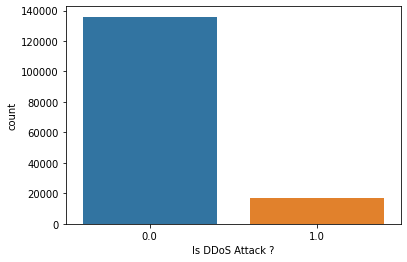

In [ ]:
sns.countplot(x=all_data["Is DDoS Attack ?"], data=all_data)

In [ ]:
num_attack = all_data[all_data["Is DDoS Attack ?"] == 1.0].shape[0]
num_normal = all_data[all_data["Is DDoS Attack ?"] == 0.0].shape[0]
print("The number of DDosS Attack Block:", num_attack)
print("The number of Normal Block:", num_normal)
print("Normal over DDoS Attack ratio:", num_normal / num_attack)

The number of DDosS Attack Block: 16999
The number of Normal Block: 135941
Normal over DDoS Attack ratio: 7.9969998235190305


## Correlation Matrix

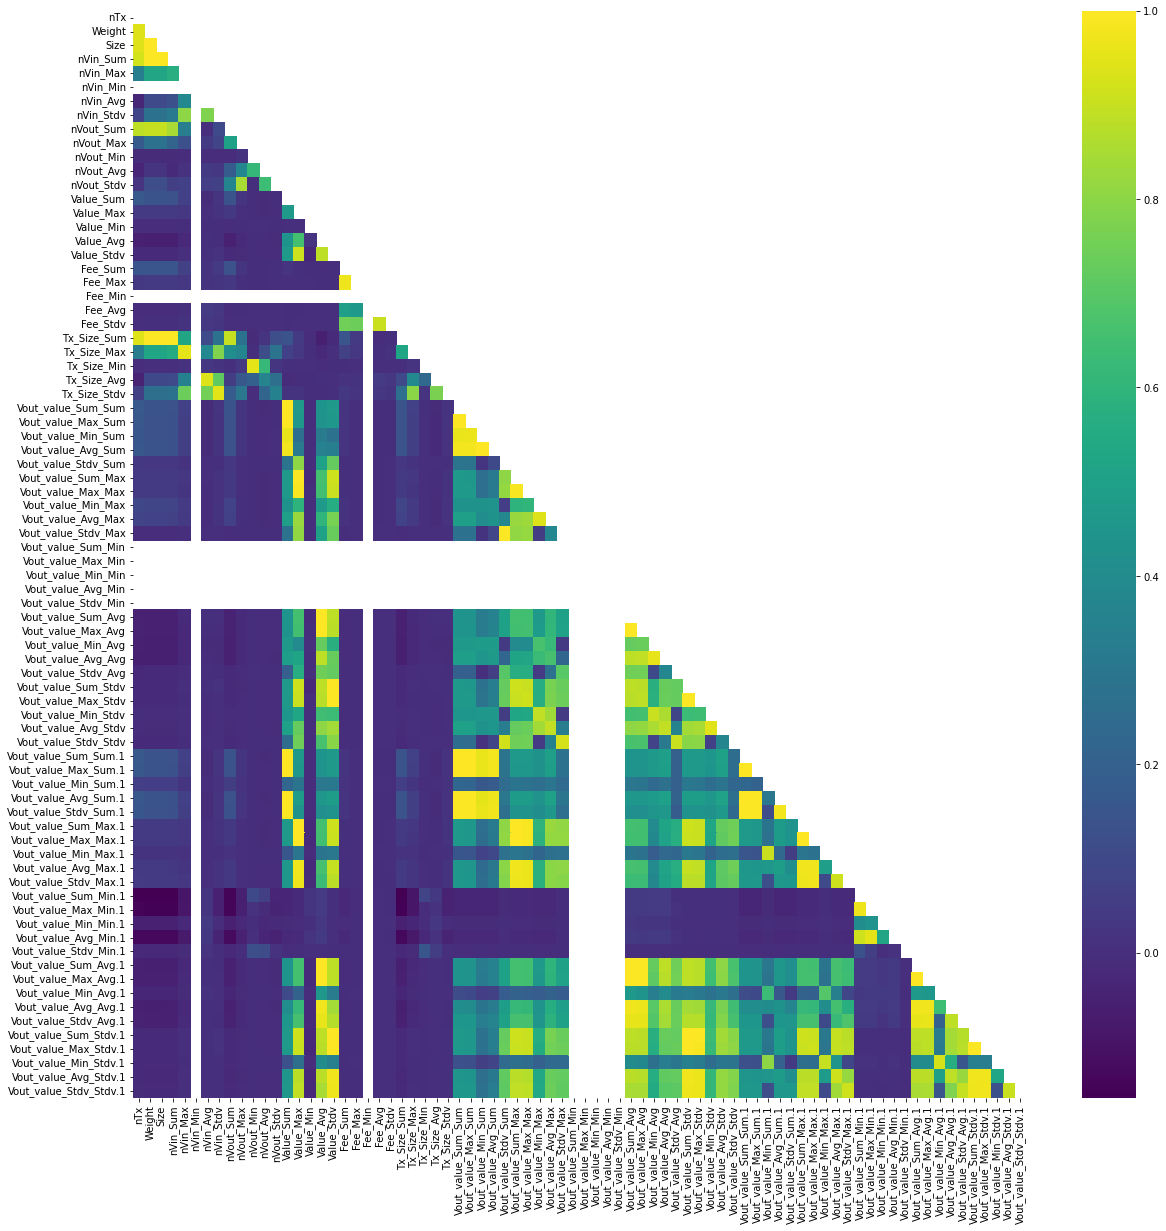

In [ ]:
plt.figure(figsize=(20, 20))
mask = np.zeros_like(all_data.iloc[:, :-1].corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(all_data.iloc[:, :-1].corr(), mask=mask, cmap='viridis')

Some comments:
- There are 7 columns with a visible different behaviour: nVin_Min, Fee_Min, Vout_value_Sum_Min, Vout_value_Max_Min, Vout_value_Min_Min, Vout_value_Avg_Min and 
- There are some (strongly) corelated features (typically when taking Avg or Stdv)

In [ ]:
strange_behavior_columns = ["nVin_Min", "Fee_Min", "Vout_value_Sum_Min", "Vout_value_Max_Min", "Vout_value_Min_Min", "Vout_value_Avg_Min", "Vout_value_Stdv_Min"]
for column in strange_behavior_columns:
    print(all_data[column].value_counts(), "\n")

1.0    152940
Name: nVin_Min, dtype: int64 

0.0    152940
Name: Fee_Min, dtype: int64 

0.0    152940
Name: Vout_value_Sum_Min, dtype: int64 

0.0    152940
Name: Vout_value_Max_Min, dtype: int64 

0.0    152940
Name: Vout_value_Min_Min, dtype: int64 

0.0    152940
Name: Vout_value_Avg_Min, dtype: int64 

0.0    152940
Name: Vout_value_Stdv_Min, dtype: int64 



In [ ]:
# Drop these constant columns
all_data = all_data.drop(columns=strange_behavior_columns)

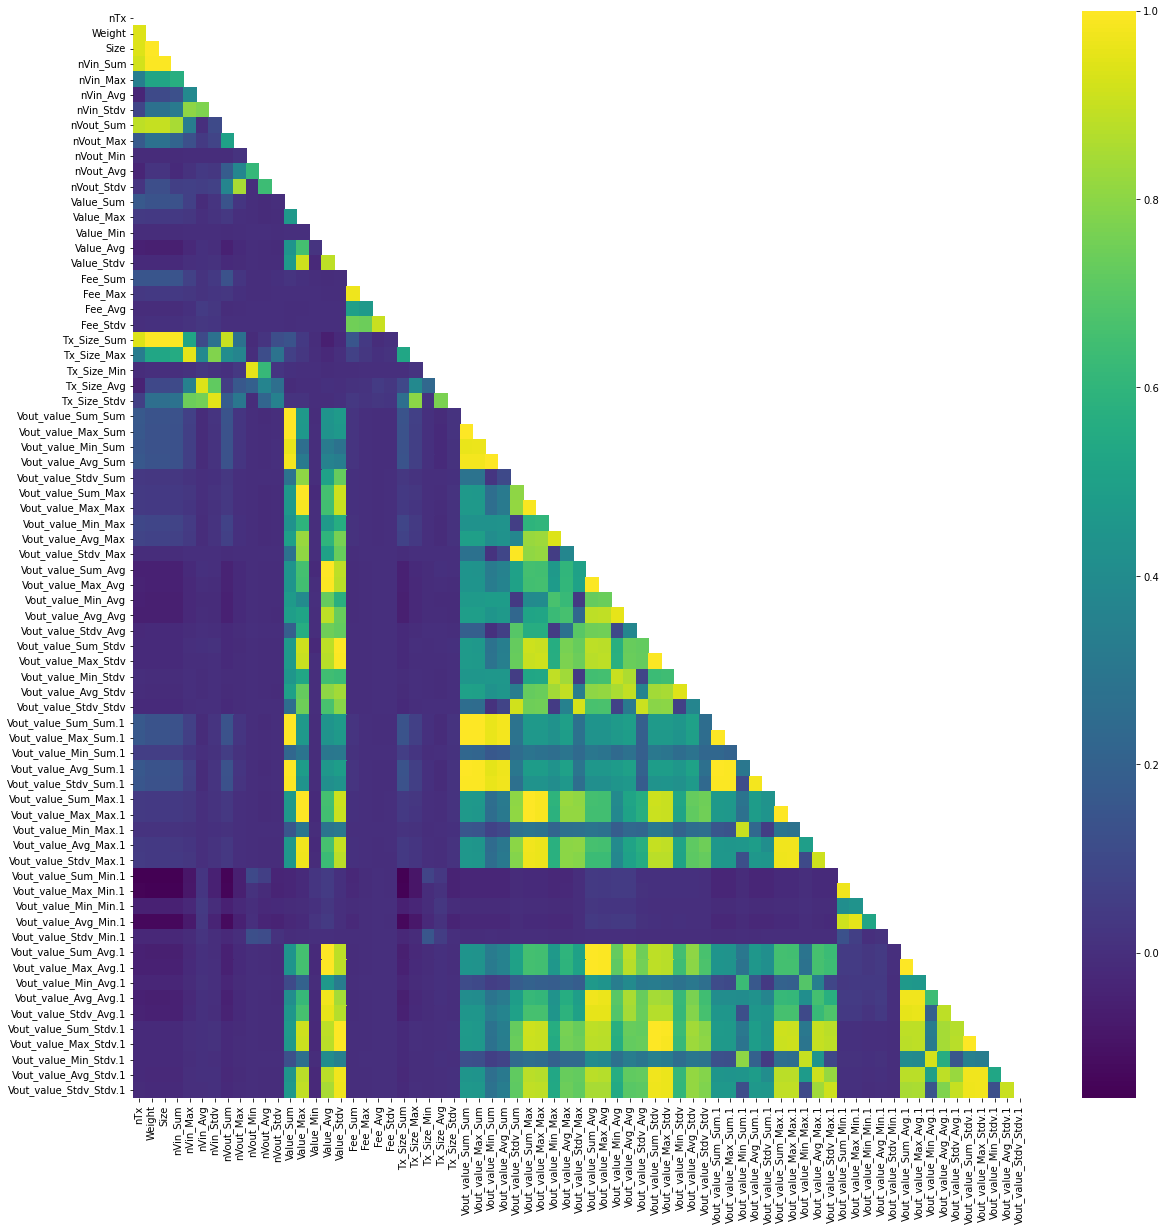

In [ ]:
plt.figure(figsize=(20, 20))
mask = np.zeros_like(all_data.iloc[:, :-1].corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(all_data.iloc[:, :-1].corr(), mask=mask, cmap='viridis')

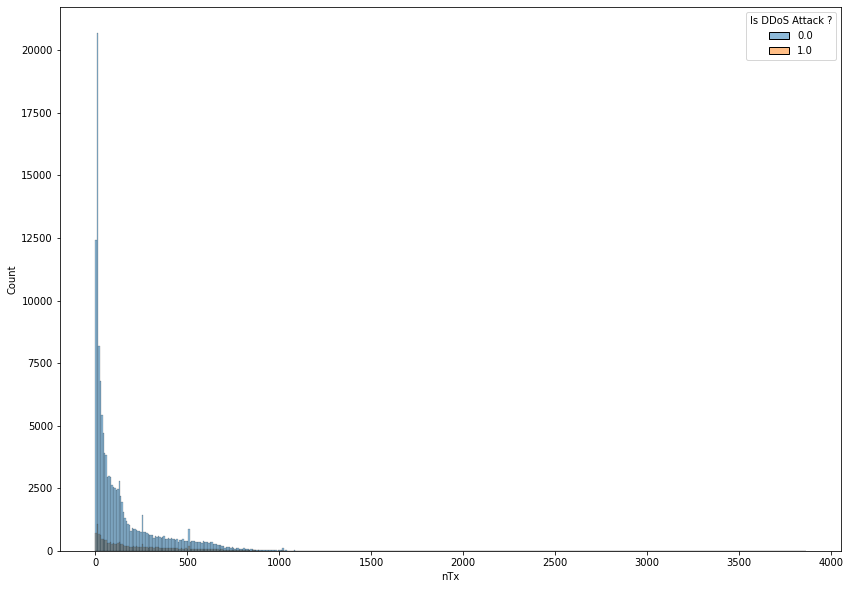

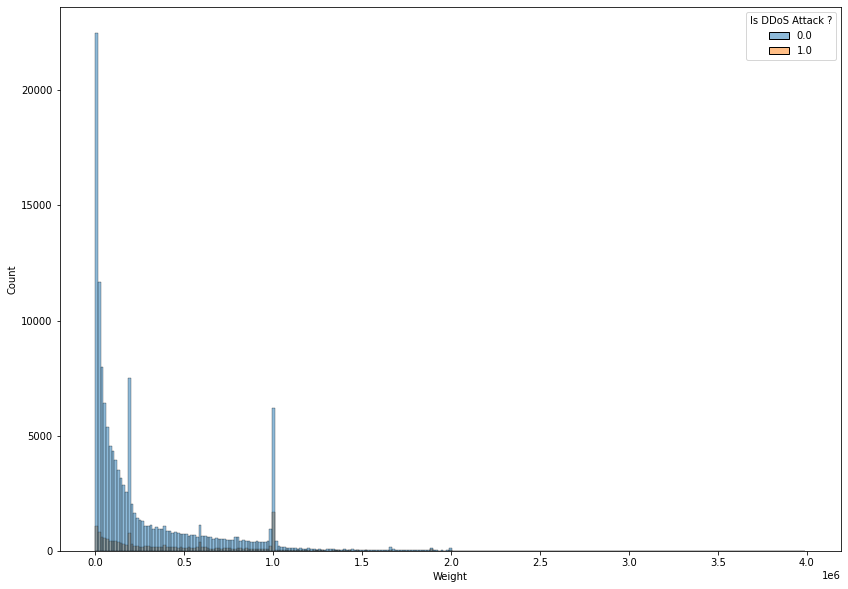

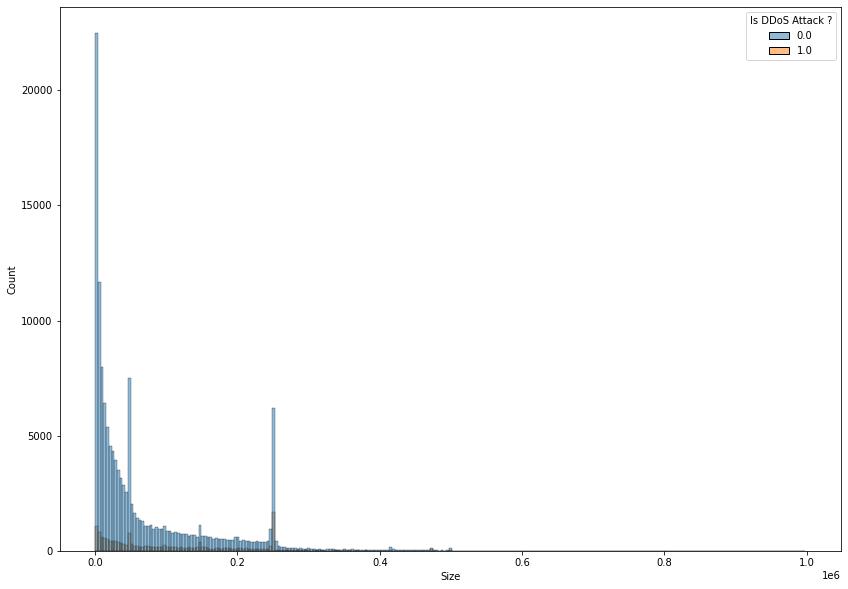

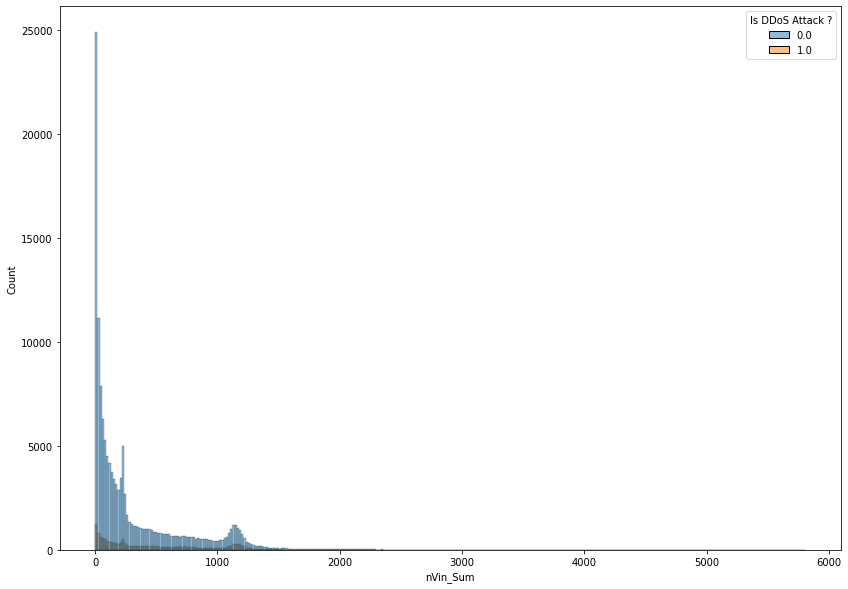

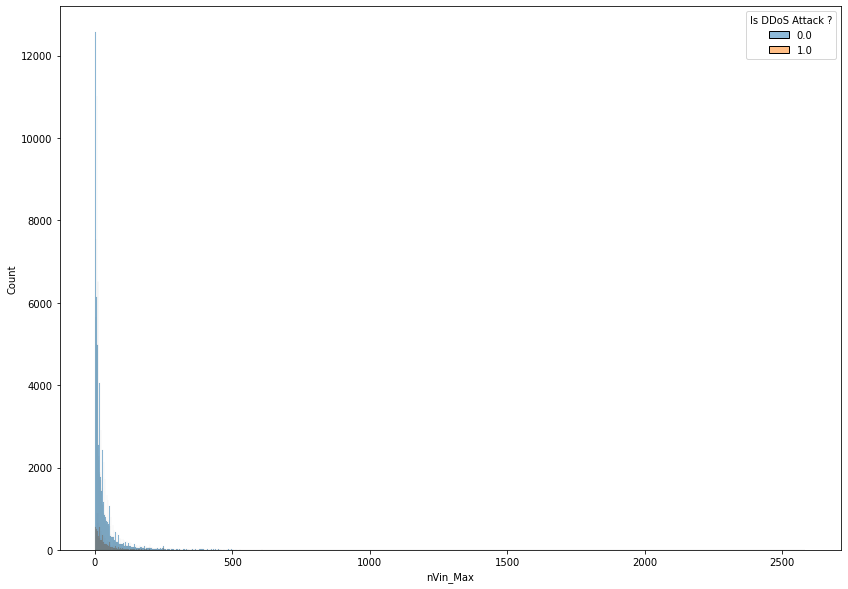

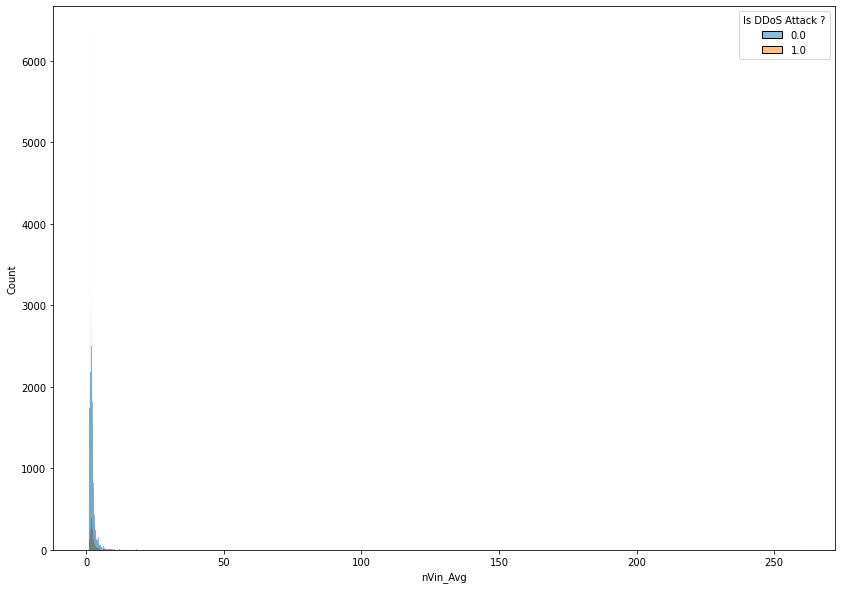

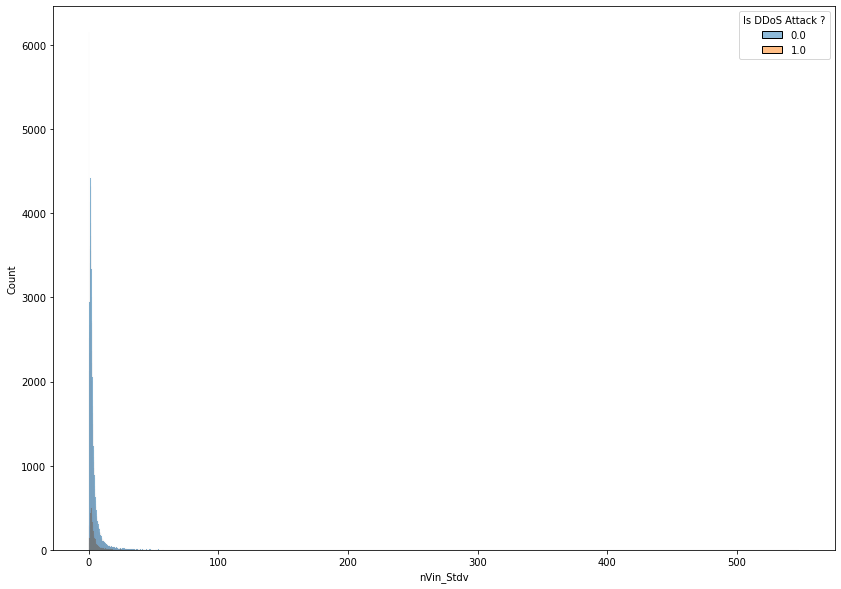

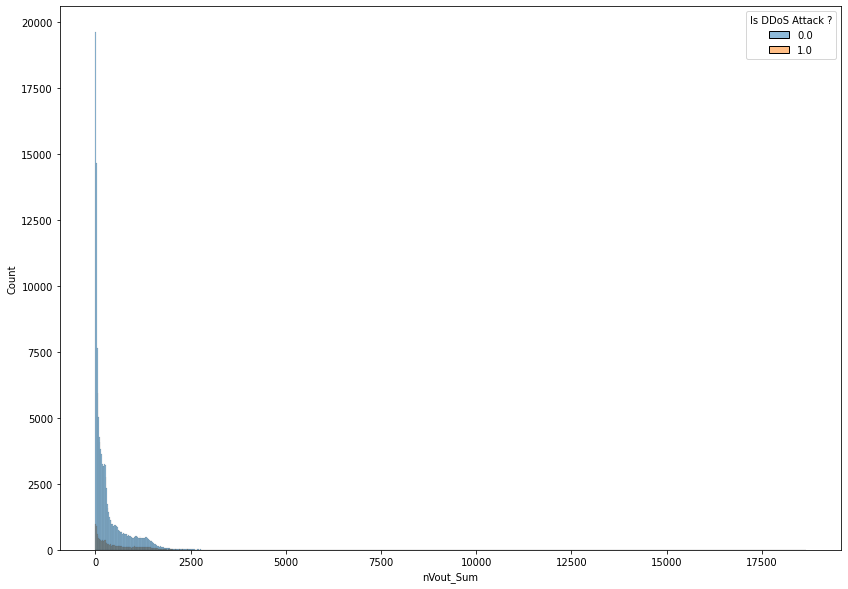

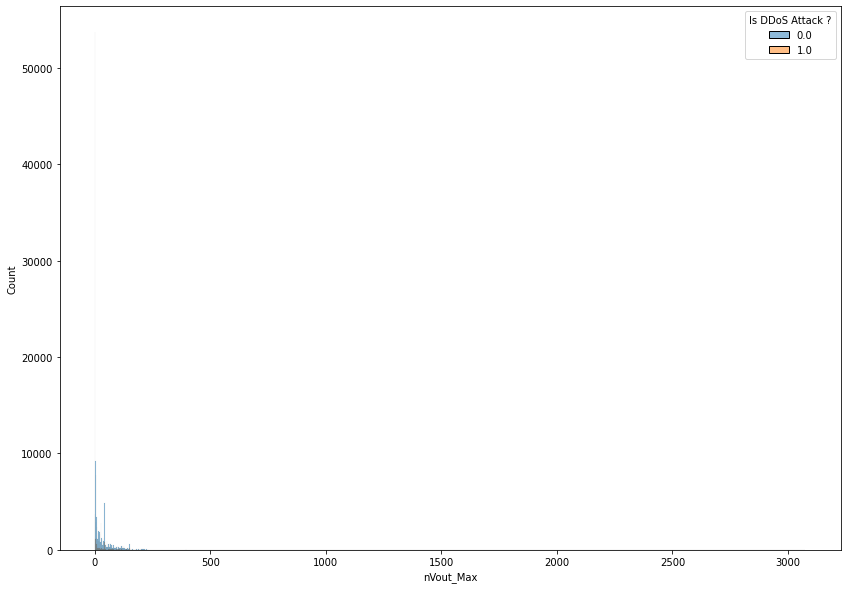

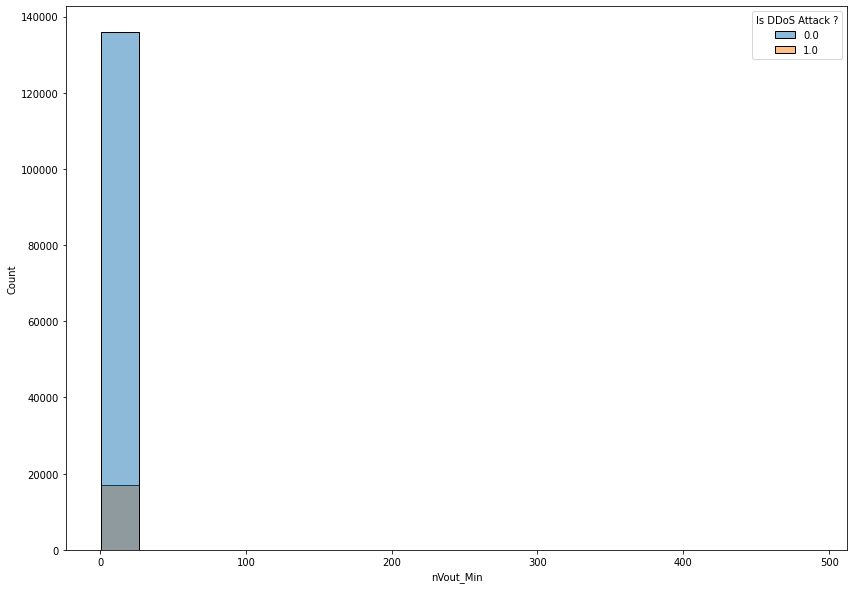

In [ ]:
for column in all_data.columns[:10]:
    plt.figure(figsize=(14, 10))
    sns.histplot(all_data, x=column, hue="Is DDoS Attack ?")

In [ ]:
for column in all_data.columns[10: 15]:
    plt.figure(figsize=(14, 10))
    sns.histplot(all_data, x=column, hue="Is DDoS Attack ?")

In [ ]:
for column in all_data.columns[15: 20]:
    plt.figure(figsize=(14, 10))
    sns.histplot(all_data, x=column, hue="Is DDoS Attack ?")

In [ ]:
for column in all_data.columns[20: 30]:
    plt.figure(figsize=(14, 10))
    sns.histplot(all_data, x=column, hue="Is DDoS Attack ?")

In [ ]:
for column in all_data.columns[30: 40]:
    plt.figure(figsize=(14, 10))
    sns.histplot(all_data, x=column, hue="Is DDoS Attack ?")

In [ ]:
for column in all_data.columns[40: 50]:
    plt.figure(figsize=(14, 10))
    sns.histplot(all_data, x=column, hue="Is DDoS Attack ?")

In [ ]:
for column in all_data.columns[50: 60]:
    plt.figure(figsize=(14, 10))
    sns.histplot(all_data, x=column, hue="Is DDoS Attack ?")

In [ ]:
for column in all_data.columns[60:]:
    plt.figure(figsize=(14, 10))
    sns.histplot(all_data, x=column, hue="Is DDoS Attack ?")

# Save data

In [ ]:
all_data.to_csv("/content/drive/MyDrive/Crypto2022/data/extracted_data/all_ddos_data.csv", index=False)